# Tarea PySpark
## Tercer Apartado

__Enunciado__: Analizar el error cometido (rmse) por el sistema de recomendación ALS-pySpark con el data set de movielens. El error obtenido ¿es aceptable?


In [2]:
from recomALS import recomienda
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_table("sample_movielens_ratings.txt", sep="::", header=None)
df.columns = ['user_id', 'movie_id', 'rating', 'time_stamp']
df

user_id  movie_id  rating  time_stamp
0           0         2       3  1424380312
1           0         3       1  1424380312
2           0         5       2  1424380312
3           0         9       4  1424380312
4           0        11       1  1424380312
...       ...       ...     ...         ...
1496       29        90       4  1424380312
1497       29        93       1  1424380312
1498       29        94       4  1424380312
1499       29        97       1  1424380312
1500       29        99       1  1424380312

[1501 rows x 4 columns]

Como se puede ver las películas están valoradas de 1 a 5 (pudieran ser estrellas).

In [20]:
df.rating.unique()

array([3, 1, 2, 4, 5])

In [2]:
rmse_vector = []
for i in range(1,101): # cambiar el tiempo de sleep si se quiere ir más rápido pero sin el sleep falla porque no le da tiempo a matar la session
    rmse_vector.append(recomienda())


6],...|
|     1|[[30, 3.965221], ...|
|    13|[[93, 3.3133566],...|
|     6|[[25, 5.098317], ...|
|    16|[[92, 5.2318077],...|
|     3|[[30, 5.2952566],...|
|    20|[[22, 4.650692], ...|
|     5|[[24, 4.7184806],...|
|    19|[[32, 4.1440163],...|
|    15|[[94, 5.260802], ...|
|    17|[[12, 5.9754667],...|
|     9|[[49, 4.984301], ...|
|     4|[[2, 5.002766], [...|
|     8|[[38, 5.8839927],...|
|    23|[[90, 5.3539605],...|
|     7|[[25, 4.659784], ...|
+------+--------------------+
only showing top 20 rows

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|     31|[[12, 3.8863196],...|
|     85|[[16, 5.081942], ...|
|     65|[[12, 5.0837793],...|
|     53|[[21, 4.8838525],...|
|     78|[[14, 1.2119229],...|
|     34|[[26, 5.614525], ...|
|     81|[[28, 4.5390487],...|
|     28|[[16, 3.8254912],...|
|     76|[[14, 5.0266056],...|
|     26|[[25, 1.9279517],...|
|     27|[[23, 5.096064], ...|
|     44|[[11, 4.4926777],...|
|     12|[[17, 5.9754

Veamos las tablas que obtiene el recomendador con detalle:

In [21]:
recomienda()

Root-mean-square error = 1.7742021386039335
+------+--------------------+
|userId|     recommendations|
+------+--------------------+
|    28|[[55, 5.7253637],...|
|    26|[[89, 5.118664], ...|
|    27|[[30, 4.8950257],...|
|    12|[[55, 6.6368303],...|
|    22|[[30, 5.092866], ...|
|     1|[[53, 4.3159995],...|
|    13|[[52, 3.5352392],...|
|     6|[[29, 4.7189426],...|
|    16|[[25, 5.4376383],...|
|     3|[[32, 5.461507], ...|
|    20|[[96, 4.4503536],...|
|     5|[[55, 4.6425233],...|
|    19|[[22, 4.3297834],...|
|    15|[[1, 3.8621876], ...|
|    17|[[17, 4.967156], ...|
|     9|[[7, 4.6019206], ...|
|     4|[[29, 4.323852], ...|
|     8|[[52, 5.278438], ...|
|    23|[[46, 5.8906064],...|
|     7|[[29, 4.8950605],...|
+------+--------------------+
only showing top 20 rows

+-------+--------------------+
|movieId|     recommendations|
+-------+--------------------+
|     31|[[16, 4.6231036],...|
|     85|[[16, 4.906841], ...|
|     65|[[23, 4.9543524],...|
|     53|[[21, 4.8367443

1.7742021386039335

La primera tabla es las 10 primeras recomendaciones para el usuario.

La segunda tabla es los 10 primeros usuarios para cada película.

In [6]:
rmse_medio = sum(rmse_vector)/len(rmse_vector)
rmse_medio

1.7862940102441782

In [28]:
np.median(rmse_vector)

1.7731857873111634

Vemos que la media y la mediana se encuentran muy cerca lo que indica que no tenemos valores anormales en las colas de la distribución.

In [25]:
np.std(rmse_vector)

0.1424877685488729

Text(0.5, 0, 'RMSE')

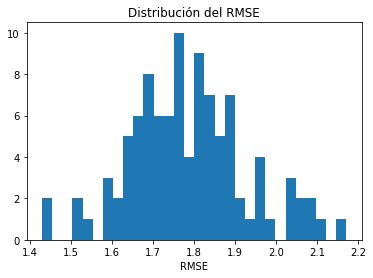

In [30]:
plt.hist(rmse_vector,bins=30)
plt.title("Distribución del RMSE")
plt.xlabel("RMSE")

Si asumimos una distribución gaussiana con $\mu = 1.786$ y $\sigma = 0.142$, podemos ver como el recomendador en la mayoría de las veces, 95%, tendrá un RMSE de como mucho $\mu \pm 3\cdot \sigma = [1.4, 2.2]$

Esta horquilla significa que el recomendador ofrecerá a los usuario películas pensando que les darán una nota determinada, por ejemplo 3, y el usuario se irá como mucho, en el 95% de los casos, entre 1.4 y 2.2 para la media de espectadores. 

Si nos atenemos a que las notas son discretas, estrellas, esto implica que nos iremos una o dos estrellas del resultado.



Pero que pasa si hacemos el regresor más sencillo posible, aquel que asume la misma nota para todos, la media.

In [10]:
mu = df.rating.mean()
mu

1.7741505662891406

El error RMSE cometido por este regresor será:

In [11]:
np.sqrt(((df.rating - mu)**2).sum()/df.shape[0])

1.1868806051722542

Este error es menor que el cometido por el regresor complicado por lo que podemos decir que es un resultado penoso.